In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
import pandas as pd

In [35]:
import seaborn as sns
sns.set_style("darkgrid")

In [46]:
from nltk.corpus import stopwords
import string

In [5]:
filepath = "./SpamDitection/SMSSpamCollection"
with open(filepath,"r") as f:
    content = f.readlines()

In [9]:
content = pd.read_csv(filepath,names=['Type',"Message"],sep='\t')

In [10]:
content.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
typeofmessage = ['ham','spam']

In [13]:
content['TypeofMessage'] = content.Type.apply(lambda a : typeofmessage.index(a))

In [14]:
content['Length'] = content.Message.apply(len)

In [15]:
content.head()

,Type,Message,TypeofMessage,Length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [19]:
content['Length'].ipynb_checkpoints/max()

910

In [22]:
content['Length'].values.argmax()

1085

In [25]:
print(content.iloc[1085]['Message'])

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


In [26]:
print(content.iloc[1085].Type)

ham


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD7CA3C3C8>,
      dtype=object)

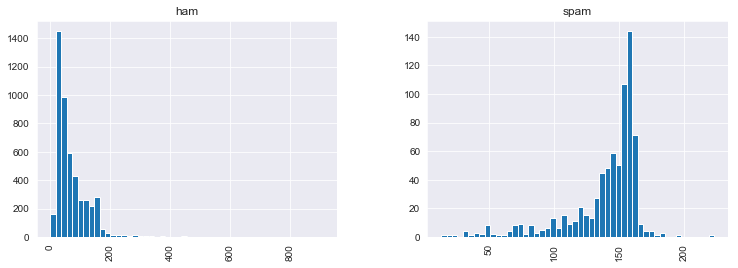

In [40]:
content.hist(column='Length', by='Type', bins=50,figsize=(12,4))

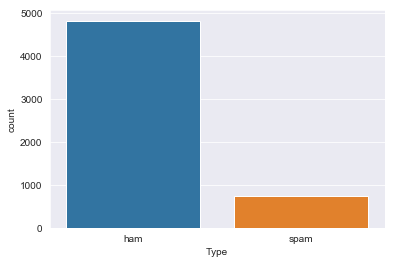

In [38]:
sns.countplot(x='Type',data=content)

<h1>Text Processing</h1>

In [51]:
print(string.punctuation)
stopword = stopwords.words('english')
print(stopword[:10])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [54]:
stringMsg = "I Like To Play Football, In The play ground!."
stringMsg = "".join([i for i in stringMsg if i not in string.punctuation])
stringMsg = " ".join([i for i in stringMsg.split(" ") if i.lower() not in stopword])
print(stringMsg)

Like Play Football play ground


In [63]:
def text_processing(stringMsg):
    stringMsg = "".join([i for i in stringMsg if i not in string.punctuation])
    stringMsg = " ".join([i for i in stringMsg.split(" ") if i.lower() not in stopword])
    return stringMsg

In [64]:
content['Message'] = content['Message'].apply(text_processing)

In [68]:
content['Length'] = content['Message'].apply(len)

In [69]:
content['Length'].values

array([ 82,  23, 135, ...,  28,  82,  14], dtype=int64)

In [73]:
content['Length'].values.max()

516

In [75]:
content.iloc[:5]['Message'].values

array(['Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat',
       'Ok lar Joking wif u oni',
       'Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questionstd txt rateTCs apply 08452810075over18s',
       'U dun say early hor U c already say',
       'Nah dont think goes usf lives around though'], dtype=object)

<h1>Train Test Split</h1>

In [77]:
content.Message.shape

(5572,)

In [83]:
def train_test_split(X,y,random_state=42,test_size=0.25):
    import numpy as np
    np.random.seed(random_state)
    m = X.shape[0]
    train_size = int(m * (1-test_size))
    random_index = np.random.permutation(m)
    train = random_index[:train_size]
    test = random_index[train_size:]
    
    return X[train].values,X[test].values,y[train].values,y[test].values

In [84]:
X_train,X_test,y_train,y_test = train_test_split(content.Message,content.TypeofMessage,random_state=101)

In [85]:
print("Data Details : ")
print("\nTrain data details : ")
print("===================================")
print("Shape of X_train : %s"%str(X_train.shape))
print("Shape of y_train : %s"%str(y_train.shape))
print("\nTrain data details : ")
print("===================================")
print("Shape of X_test : %s"%str(X_test.shape))
print("Shape of y_test : %s"%str(y_test.shape))

Data Details : 

Train data details : 
Shape of X_train : (4179,)
Shape of y_train : (4179,)

Train data details : 
Shape of X_test : (1393,)
Shape of y_test : (1393,)


<h1>Tokenizer</h1>

In [107]:
vocab_size = 10000
max_len = 120
padding = "post"
truncating = "post"
embedding_dim = 16
oov_token = "<oov>"

In [89]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [97]:
def reverse_dict(Dict):
    newDict = dict()
    for w,n in Dict.items():
        newDict[n] = w
    return newDict

In [98]:
reverse_word_index = reverse_dict(word_index)

In [106]:
#word_index

In [105]:
#reverse_word_index

In [108]:
seq_train = tokenizer.texts_to_sequences(X_train)
X_train1 = pad_sequences(seq_train,maxlen=max_len,padding=padding,truncating=truncating)

In [109]:
seq_test = tokenizer.texts_to_sequences(X_test)
X_test1 = pad_sequences(seq_test,maxlen=max_len,padding=padding,truncating=truncating)

In [110]:
print("Data Details : ")
print("\nTrain data details : ")
print("===================================")
print("Shape of X_train : %s"%str(X_train1.shape))
print("Shape of y_train : %s"%str(y_train.shape))
print("\nTrain data details : ")
print("===================================")
print("Shape of X_test : %s"%str(X_test1.shape))
print("Shape of y_test : %s"%str(y_test.shape))

Data Details : 

Train data details : 
Shape of X_train : (4179, 120)
Shape of y_train : (4179,)

Train data details : 
Shape of X_test : (1393, 120)
Shape of y_test : (1393,)


In [116]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_len),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [117]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [118]:
model1.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [119]:
history1 = model1.fit(X_train1,y_train,epochs=40,validation_data=(X_test1,y_test))

Train on 4179 samples, validate on 1393 samples
Epoch 1/40
4179/4179 [==============================] - 2s 517us/sample - loss: 0.3112 - acc: 0.8650 - val_loss: 0.1980 - val_acc: 0.8571
Epoch 2/40
4179/4179 [==============================] - 1s 251us/sample - loss: 0.1482 - acc: 0.9615 - val_loss: 0.1447 - val_acc: 0.9706
Epoch 3/40
4179/4179 [==============================] - 1s 250us/sample - loss: 0.1110 - acc: 0.9844 - val_loss: 0.1333 - val_acc: 0.9734
Epoch 4/40
4179/4179 [==============================] - 1s 252us/sample - loss: 0.0918 - acc: 0.9921 - val_loss: 0.1239 - val_acc: 0.9763
Epoch 5/40
4179/4179 [==============================] - 1s 245us/sample - loss: 0.0793 - acc: 0.9952 - val_loss: 0.1177 - val_acc: 0.9799
Epoch 6/40
4179/4179 [==============================] - 1s 252us/sample - loss: 0.0704 - acc: 0.9974 - val_loss: 0.1224 - val_acc: 0.9763
Epoch 7/40
4179/4179 [==============================] - 1s 245us/sample - loss: 0.0637 - acc: 0.9983 - val_loss: 0.1105 - va

In [124]:
def loss_acc(history):
    fig,ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].plot(history.history['acc'],label='Train')
    ax[0].plot(history.history['val_acc'],label='Test')
    ax[0].set_title("Accurecy")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("acc")
    ax[0].legend()
    
    ax[1].plot(history.history['loss'],label='Train')
    ax[1].plot(history.history['val_loss'],label='Test')
    ax[1].set_title("Loss")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("loss")
    ax[1].legend()

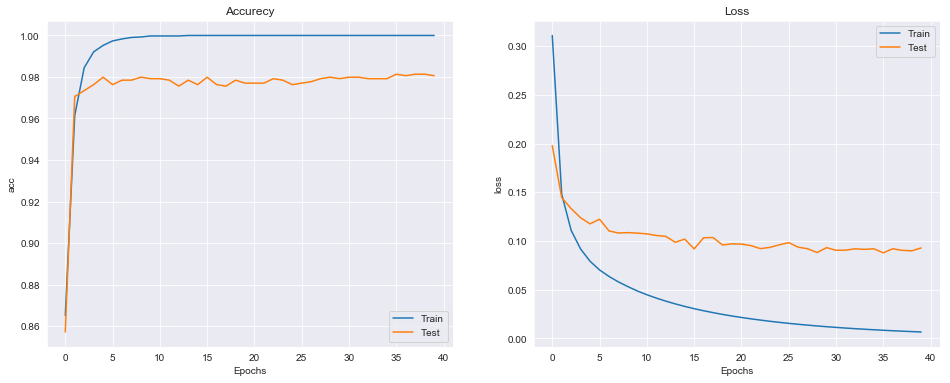

In [125]:
loss_acc(history1)

In [126]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_len),
    
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model2.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])
history2 = model2.fit(X_train1,y_train,epochs=40,validation_data=(X_test1,y_test))

Train on 4179 samples, validate on 1393 samples
Epoch 1/40
4179/4179 [==============================] - 14s 3ms/sample - loss: 0.4162 - acc: 0.8631 - val_loss: 0.1964 - val_acc: 0.8571
Epoch 2/40
4179/4179 [==============================] - 4s 972us/sample - loss: 0.1343 - acc: 0.8689 - val_loss: 0.1425 - val_acc: 0.9770
Epoch 3/40
4179/4179 [==============================] - 4s 958us/sample - loss: 0.1016 - acc: 0.9931 - val_loss: 0.1470 - val_acc: 0.9742s: 0.1011 -
Epoch 4/40
4179/4179 [==============================] - 4s 1ms/sample - loss: 0.0889 - acc: 0.9971 - val_loss: 0.1436 - val_acc: 0.9777
Epoch 5/40
4179/4179 [==============================] - 4s 934us/sample - loss: 0.0814 - acc: 0.9986 - val_loss: 0.1448 - val_acc: 0.9770
Epoch 6/40
4179/4179 [==============================] - 4s 964us/sample - loss: 0.0759 - acc: 0.9990 - val_loss: 0.1368 - val_acc: 0.9799
Epoch 7/40
4179/4179 [==============================] - 4s 926us/sample - loss: 0.0707 - acc: 0.9995 - val_loss: 0.1

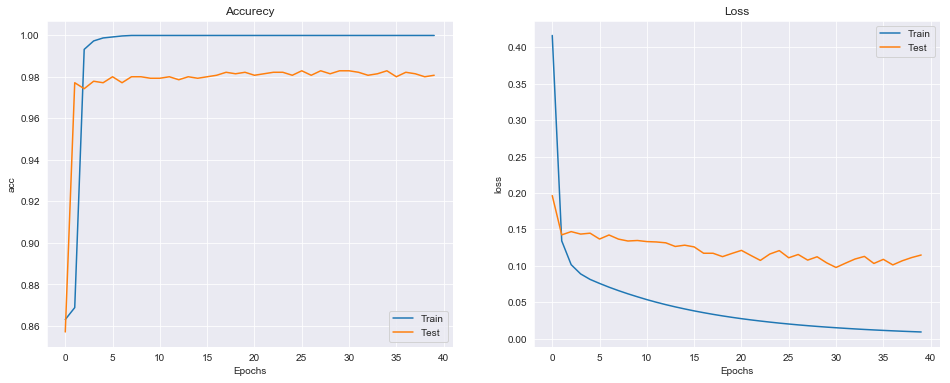

In [127]:
loss_acc(history2)

In [129]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_len),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model2.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])
history2 = model2.fit(X_train1,y_train,epochs=40,validation_data=(X_test1,y_test))

Train on 4179 samples, validate on 1393 samples
Epoch 1/40
4179/4179 [==============================] - 39s 9ms/sample - loss: 0.3371 - acc: 0.8849 - val_loss: 0.0767 - val_acc: 0.9799
Epoch 2/40
4179/4179 [==============================] - 29s 7ms/sample - loss: 0.0446 - acc: 0.9864 - val_loss: 0.0619 - val_acc: 0.9842
Epoch 3/40
4179/4179 [==============================] - 31s 7ms/sample - loss: 0.0118 - acc: 0.9971 - val_loss: 0.0936 - val_acc: 0.9835
Epoch 4/40
4179/4179 [==============================] - 30s 7ms/sample - loss: 0.0025 - acc: 0.9993 - val_loss: 0.1129 - val_acc: 0.9842
Epoch 5/40
4179/4179 [==============================] - 29s 7ms/sample - loss: 2.5884e-04 - acc: 1.0000 - val_loss: 0.0797 - val_acc: 0.9849
Epoch 6/40
4179/4179 [==============================] - 30s 7ms/sample - loss: 8.2720e-04 - acc: 0.9998 - val_loss: 0.0930 - val_acc: 0.9792
Epoch 7/40
4179/4179 [==============================] - 29s 7ms/sample - loss: 6.3767e-04 - acc: 0.9998 - val_loss: 0.1174

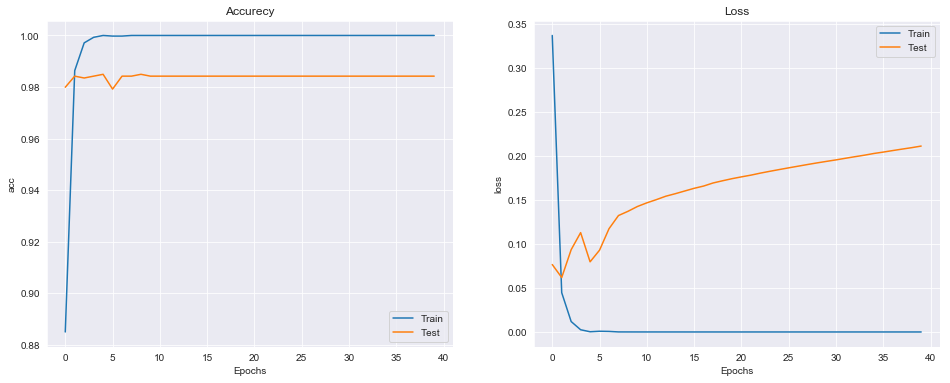

In [130]:
loss_acc(history2)

In [133]:
model2.predict_classes(X_test1[0:1])

array([[0]])

In [134]:
y_test[0]

0

In [137]:
def sen(matrix):
    string = ""
    for i in range(len(matrix)):
        if matrix[i]==0:
            break
        string += reverse_word_index[matrix[i]]
        string += " "
    return string

In [138]:
sen(X_test1[0])

'somewhere <oov> <oov> moon light someone think u dreams come true <oov> amp sweet dreams '

In [139]:
X_test[0]

'somewhere beneath pale moon light someone think u dreams come true goodnite amp sweet dreams'

In [140]:
model2.predict_classes(X_test1[401:402])

array([[1]])

In [141]:
sen(X_test1[401])

'ur hmv quiz cashbalance currently £500 maximize ur cashin send <oov> 86688 150pmsg '

In [142]:
X_test[401]

'Ur HMV Quiz cashbalance currently £500  maximize ur cashin send HMV1 86688 150pmsg'

In [144]:
print("'%s' is a : %s"%(sen(X_test1[401]) ,model1.predict_classes(X_test1[401:402])[0,0]))

'ur hmv quiz cashbalance currently £500 maximize ur cashin send <oov> 86688 150pmsg ' is a : 1
